status: optimal
optimal value 88.00051788354213
optimal var [[  2.20622802]
 [-16.83757968]]
status: optimal
optimal value 5273.532705273634
optimal var [[ 2.03632014]
 [ 1.10850232]]
(200, 1)


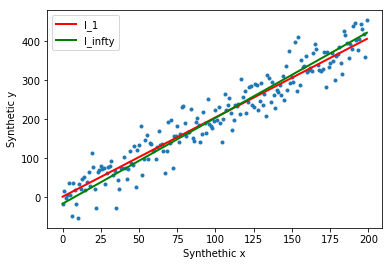

In [85]:
import numpy as np
from cvxpy import * 
import matplotlib.pyplot as plt

np.random.seed(251)
# generate a synthetic dataset

# actual parameter values
theta1_act = 2
theta2_act = 5

# Number of points in dataset
N = 200

# Noise magnitude
mag = 30

# datapoints
x_org = np.arange(0,N)
y_org = theta1_act * x_org + theta2_act *np.ones([1,N]) + np.random.normal(0,mag,N)



y=y_org.transpose()
x=x_org.transpose()
ones=np.ones(N)
x=np.column_stack((x,ones))


#l-infty norm
theta_inf = Variable(2,1)
t=Variable()
objective_inf = Minimize(t) 
constraints_inf = [y-x*theta_inf<=t*ones, y-x*theta_inf>=-t*ones]
prob_inf = Problem(objective_inf, constraints_inf)
prob_inf.solve()
print( "status:", prob_inf.status)
print( "optimal value", prob_inf.value)
print ("optimal var", theta_inf.value)

#l-1 norm 
theta_1 = Variable(2,1)
t_1=Variable(N,1)
objective_1=Minimize(ones.transpose()*t_1)
constraints_1= [y-x*theta_1<=t_1, y-x*theta_1>=-t_1]

prob_1 = Problem(objective_1, constraints_1)
prob_1.solve()
print( "status:", prob_1.status)
print( "optimal value", prob_1.value)
print ("optimal var", theta_1.value)

plt.figure()
# Scatter plot of data

plt.scatter(x_org,y_org,marker='.')

# Plot of l-1 norm 
y_1=x*theta_1.value
print(y_1.shape)
ash1=plt.plot(x_org,y_1,color='red',label='l_1',linewidth=2.0)

# Plot of l-infty norm 
y_inf=x*theta_inf.value
ash2=plt.plot(x_org,y_inf,color='green', label='l_infty',linewidth=2.0)
plt.legend()
plt.xlabel('Synthethic x')
plt.ylabel('Synthetic y')
plt.show()